**Trabajo realizado por:**  

Alejandro Barragán, Pedro Huerta y Lucia Sánchez


In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import plotly.express as px
import plotly.graph_objs as go
import imageio.v2 as imageio
import os
import plotly.io as pio

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Carga de los datos

In [3]:
obesidad = pd.read_csv("Data/obesity.csv")

|Variable Name|	Role|	Type	|Demographic	|Description|	Units	|Missing Values|
|----------|:---------|:---------|:---------|:---------|:---------|:---------|
|Gender|	Feature|	Categorical|	Gender|			| |no|
|Age|	Feature|	Continuous|	Age|	 |		|no|
|Height|	Feature|	Continuous|		 |		| |no|
|Weight|	Feature|	Continuous|		 |		| |no|
|family_history_with_overweight|	Feature|	Binary|	| 	Has a family member suffered or suffers from overweight?|		|no|
|FAVC|	Feature|	Binary|	  | Do you eat high caloric food frequently?|		|no|
|FCVC|	Feature|	Integer|	 | Do you usually eat vegetables in your meals?|		|no|
|NCP|	Feature|	Continuous|	 | How many main meals do you have daily?|		|no|
|CAEC|	Feature|	Categorical|  | Do you eat any food between meals?|		|no|
|SMOKE|	Feature|	Binary|	| Do you smoke?|		|no|
|CH2O|	Feature|	Continuous|		|How much water do you drink daily?|		|no|
|SCC|	Feature|	Binary|		|Do you monitor the calories you eat daily?|		|no|
|FAF|	Feature|	Continuous|		|How often do you have physical activity?|		|no|
|TUE|	Feature|	Integer|		|How much time do you use technological devices such as cell phone, videogames, television, computer and others?|		|no|
|CALC|	Feature|	Categorical|		|How often do you drink alcohol?|		|no|
|MTRANS|	Feature|	Categorical|		|Which transportation do you usually use?|		|no|
|NObeyesdad|	Target|	Categorical|		|Obesity level|		|no|

# Procesado de los datos

In [4]:
obesidad.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
obesidad.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Cambiamos el nombre de las columnas para facilitar la comprensión

In [6]:
obesidad.columns = ['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'obesity_type']

En principio no tiene NAs, pero vamos a asegurarnos

In [7]:
obesidad_sin_nulos = obesidad.dropna()

Veamos si sus caracteristicas sin las mismas

In [8]:
print(obesidad_sin_nulos.shape,obesidad.shape,'son iguales')

(2111, 17) (2111, 17) son iguales


Ahora veamos si hay algun outlier o algún dato incorrecto

In [9]:
columnas_no_numericas=obesidad.select_dtypes(exclude='number').columns
for campo in columnas_no_numericas:
    print(obesidad[campo].unique())
print('Entre los campos no numéricos no se ve ningún elemento incorrecto, pero vamos a dar categorias para poder hacer\nuna buena visualizacion')

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Entre los campos no numéricos no se ve ningún elemento incorrecto, pero vamos a dar categorias para poder hacer
una buena visualizacion


In [10]:
#Para tipos de obesidad
orden_categorias = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']
obesidad['obesity_type'] = pd.Categorical(obesidad['obesity_type'], categories=orden_categorias, ordered=True)
#Para CAEC, ¿comes entre comidas?
orden_categorias = ['no', 'Sometimes', 'Frequently', 'Always']
obesidad['CAEC'] = pd.Categorical(obesidad['CAEC'], categories=orden_categorias, ordered=True)
#Para CALC, ¿bebes alcohol?
orden_categorias = ['no', 'Sometimes', 'Frequently', 'Always']
obesidad['CALC'] = pd.Categorical(obesidad['CALC'], categories=orden_categorias, ordered=True)

Ahora estudiemos las numéricas

In [11]:
obesidad.select_dtypes(include='number').describe()

,age,height,weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Se puede observar que hay mucha gente joven en el estudio, y muy poca muestra para gente mayor 

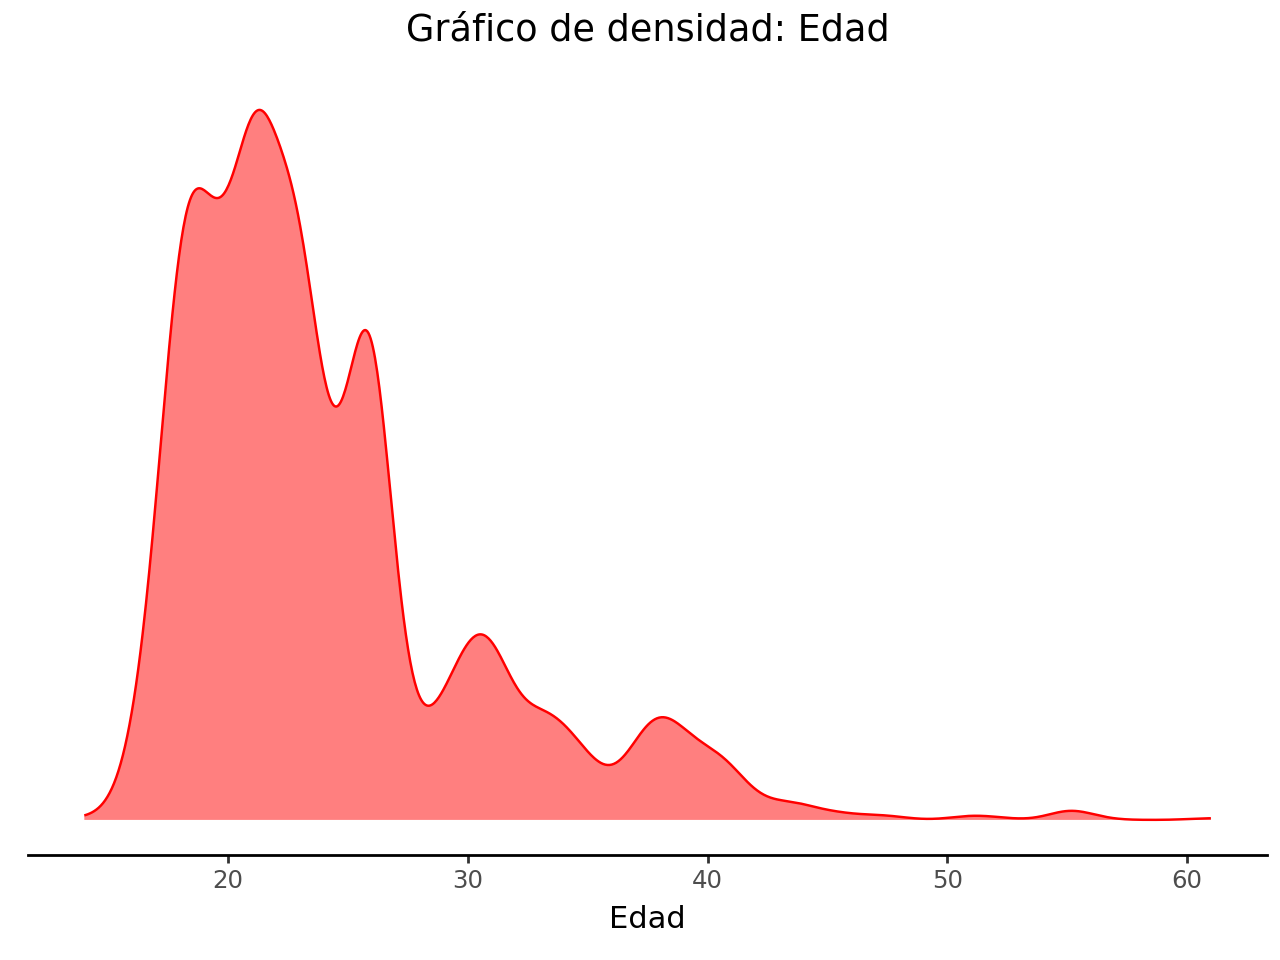


La mayoria de la gente es muy joven, hay baja representatividad de personas mayores


In [12]:
print(ggplot(obesidad, aes(x='age')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Edad',
           x = 'Edad') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('La mayoria de la gente es muy joven, hay baja representatividad de personas mayores')

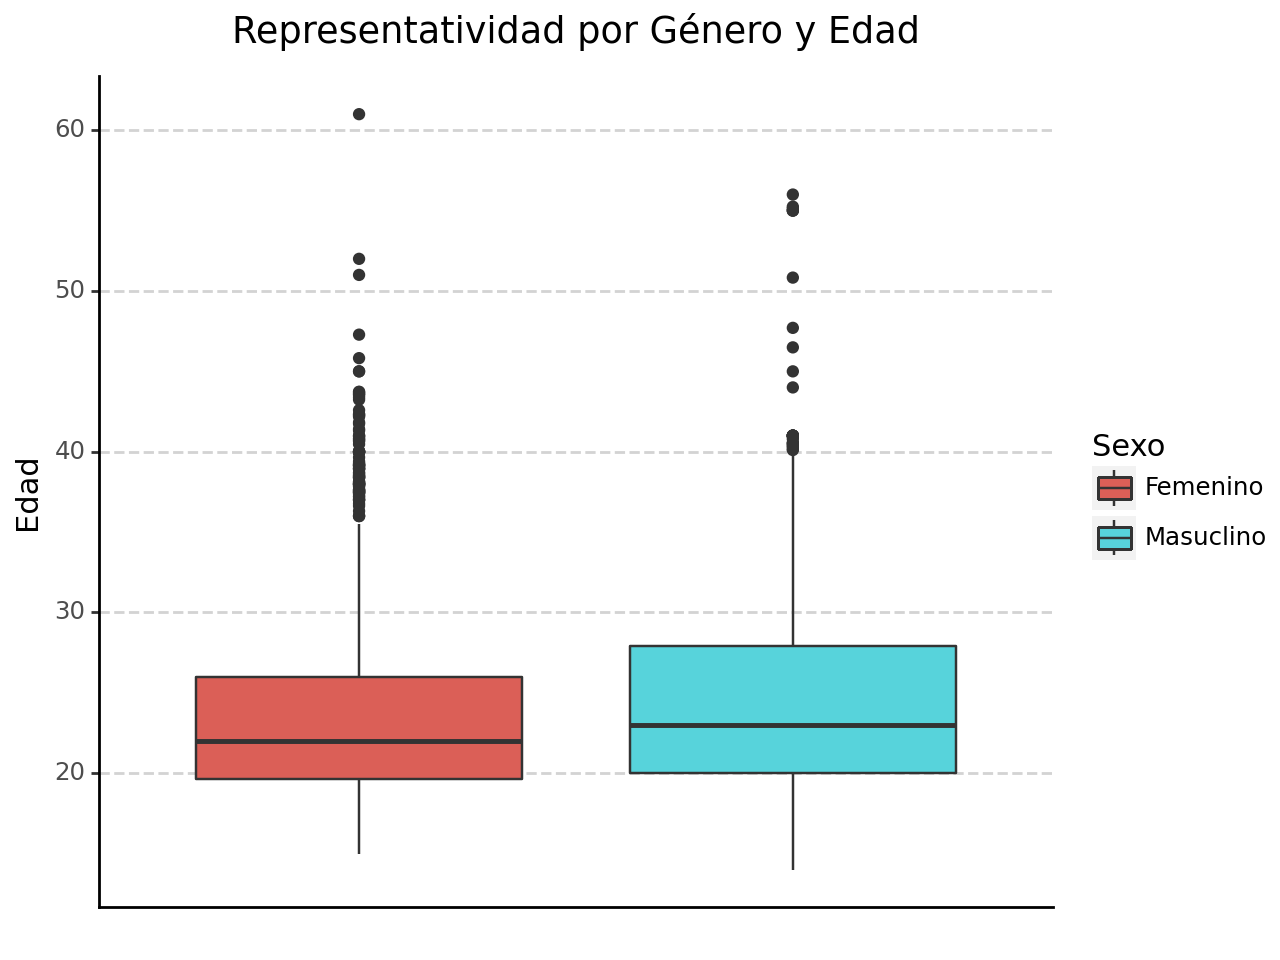

<Figure Size: (640 x 480)>

In [13]:
(ggplot(obesidad, aes(x='gender', y='age',fill = 'gender')) +
 geom_boxplot() + 
 labs(x = '',y = 'Edad',title = 'Representatividad por Género y Edad',fill = 'Sexo') + 
 scale_fill_discrete(labels={'Female': 'Femenino', 'Male': 'Masuclino'}) +
 theme(plot_title=element_text(hjust=0.5),
       axis_text_x = element_blank(),
       axis_ticks_major_x=element_blank(),
       panel_background=element_blank(),
       axis_line = element_line(color = "black", size=1),
       panel_grid_major_y = element_line(color = "lightgrey", linetype='dashed'))
)


In [14]:
print('A partir de los 40 años se tiene muy poca representatividad de esta parte la población,\nes por ello que quitamos esos resultados')
obesidad=obesidad.loc[obesidad['age']<=40]

A partir de los 40 años se tiene muy poca representatividad de esta parte la población,
es por ello que quitamos esos resultados


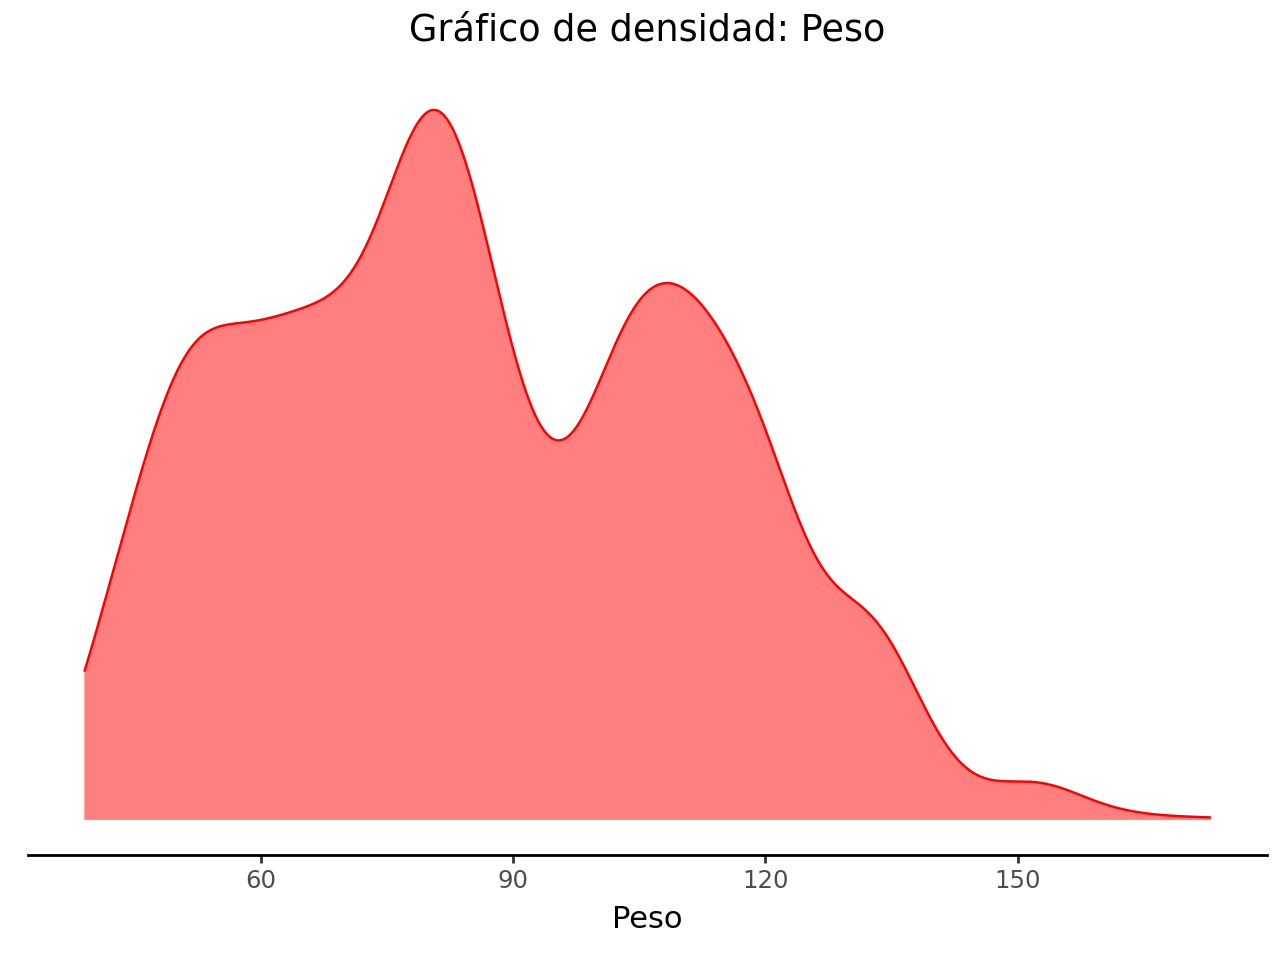


Los datos dados sobre el peso son correctos, tiene un distribución lógica


In [15]:
print(ggplot(obesidad, aes(x='weight')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Peso',x = 'Peso') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Los datos dados sobre el peso son correctos, tiene un distribución lógica')

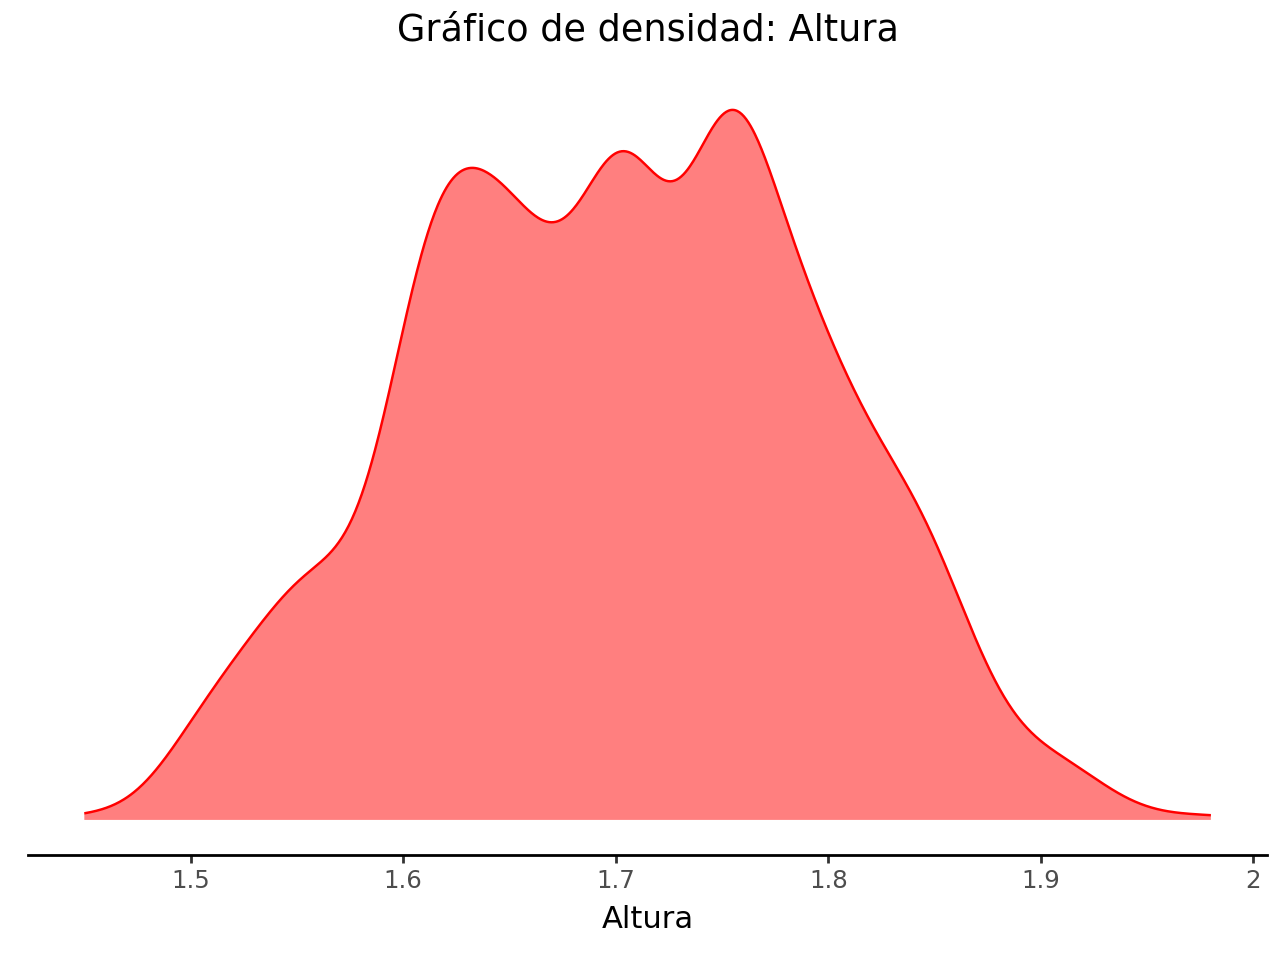


Los datos dados sobre la altura son correctos, tiene un distribución lógica


In [16]:
print(ggplot(obesidad, aes(x='height')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Altura',x = 'Altura') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Los datos dados sobre la altura son correctos, tiene un distribución lógica')

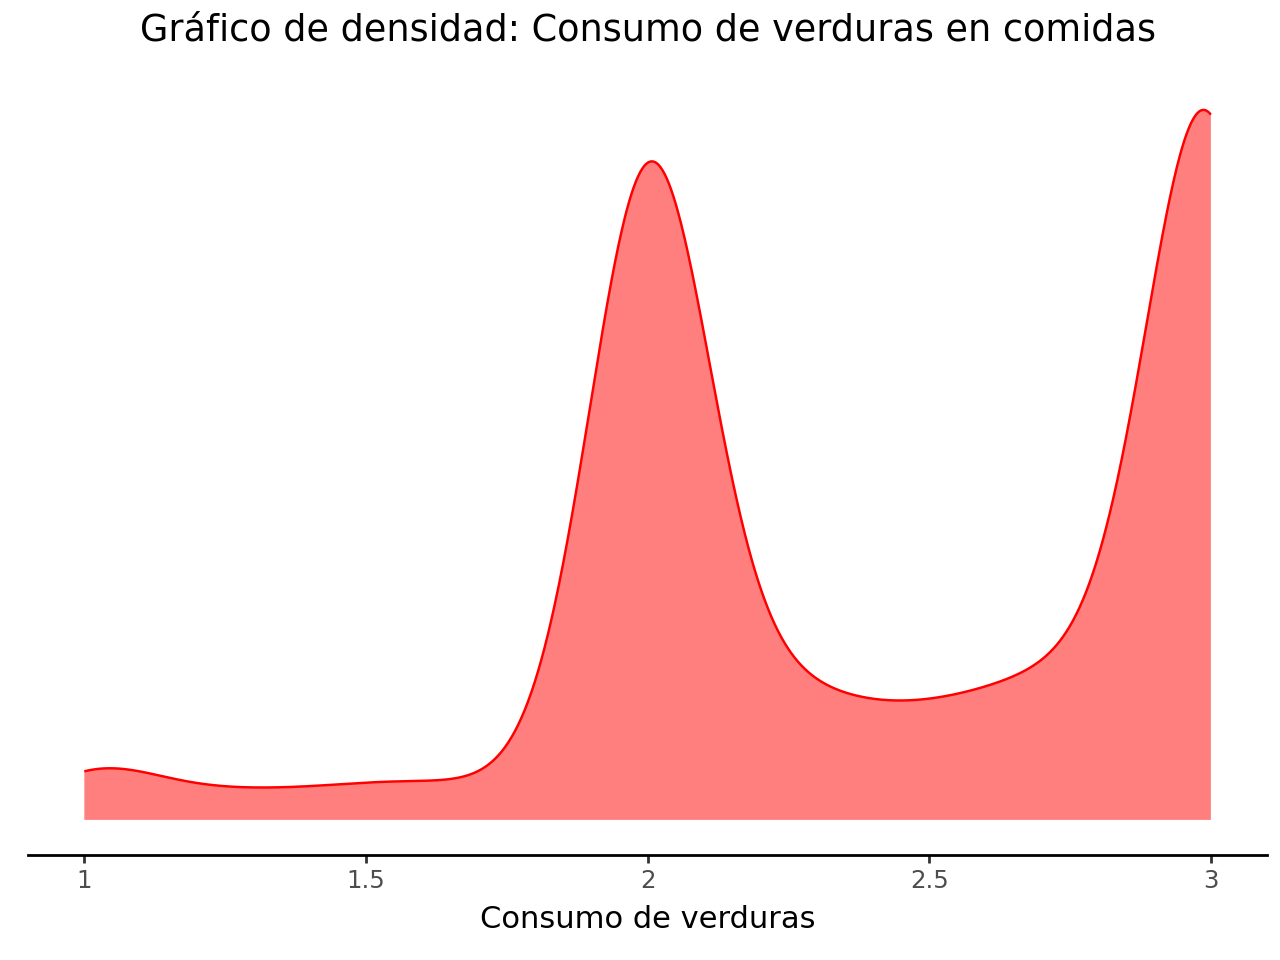


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [17]:
print(ggplot(obesidad, aes(x='FCVC')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Consumo de verduras en comidas',x = 'Consumo de verduras') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [18]:
def vegetales(verdura):
    if verdura <= 1.5:
        return "Nunca"
    elif verdura <= 2.5:
        return "Algunas veces"
    else:
        return "Siempre"
    
#Para FCVC, ¿comes verduras?
obesidad['vegetables'] = obesidad['FCVC'].apply(vegetales)
orden_categorias = ["Nunca","Algunas veces","Siempre"]
obesidad['vegetables'] = pd.Categorical(obesidad['vegetables'], categories=orden_categorias, ordered=True)

In [19]:
print(obesidad['vegetables'].unique())

['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']


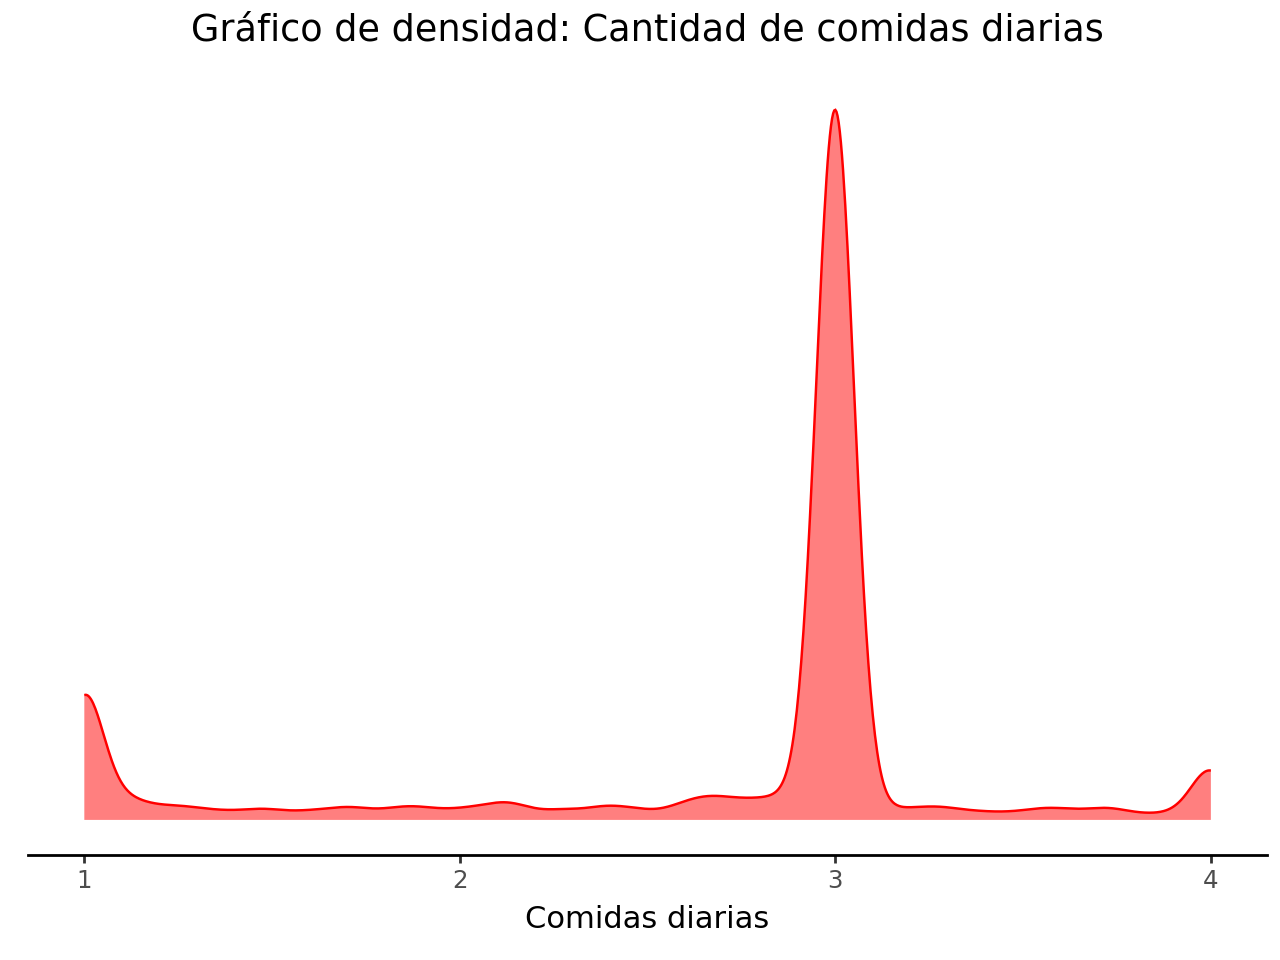


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [20]:
print(ggplot(obesidad, aes(x='NCP')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Cantidad de comidas diarias',x = 'Comidas diarias') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [21]:
def comidas(comida):
    if comida <= 2:
        return "Entre 1 y 2"
    elif comida <= 3.5:
        return "Tres"
    else:
        return "Más de tres"

#Para NCP, ¿cuantas comidas realizas?
obesidad['comidas'] = obesidad['NCP'].apply(comidas)
orden_categorias = ["Entre 1 y 2","Tres","Más de tres"]
obesidad['comidas'] = pd.Categorical(obesidad['comidas'], categories=orden_categorias, ordered=True)

In [22]:
print(obesidad['comidas'].unique())

['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']


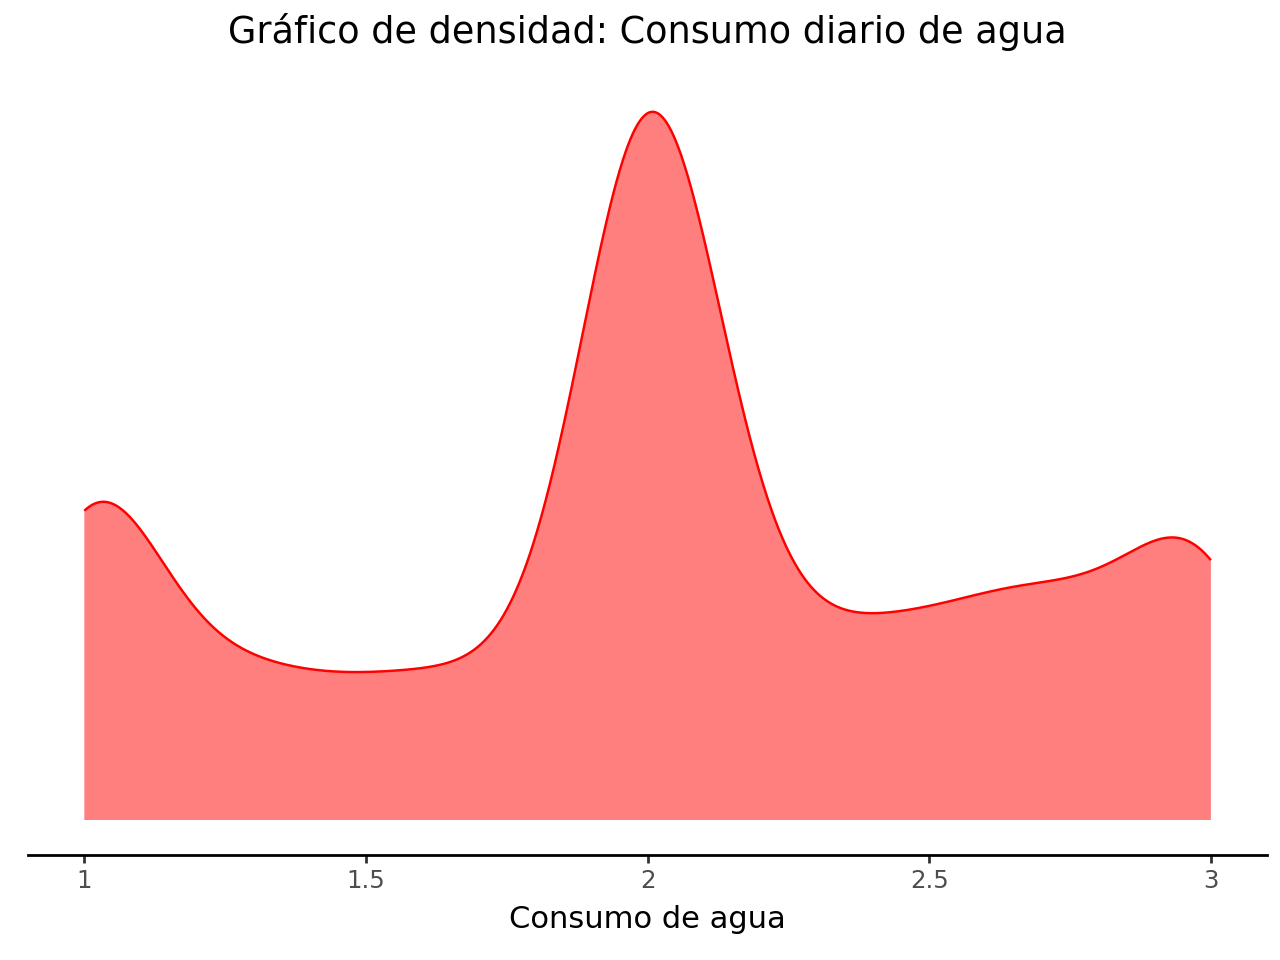


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [23]:
print(ggplot(obesidad, aes(x='CH2O')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Consumo diario de agua',x = 'Consumo de agua') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [24]:
def litros(agua):
    if agua <= 1.5:
        return "Menos de 1L"
    elif agua <= 2.5:
        return "1L-2L"
    else:
        return "Más de 2L"

#Para CH2O, ¿Cuanto agua bebes en un día?
obesidad['water'] = obesidad['CH2O'].apply(litros)
orden_categorias = ["Menos de 1L","1L-2L","Más de 2L"]
obesidad['water'] = pd.Categorical(obesidad['water'], categories=orden_categorias, ordered=True)

In [25]:
print(obesidad['water'].unique())

['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']


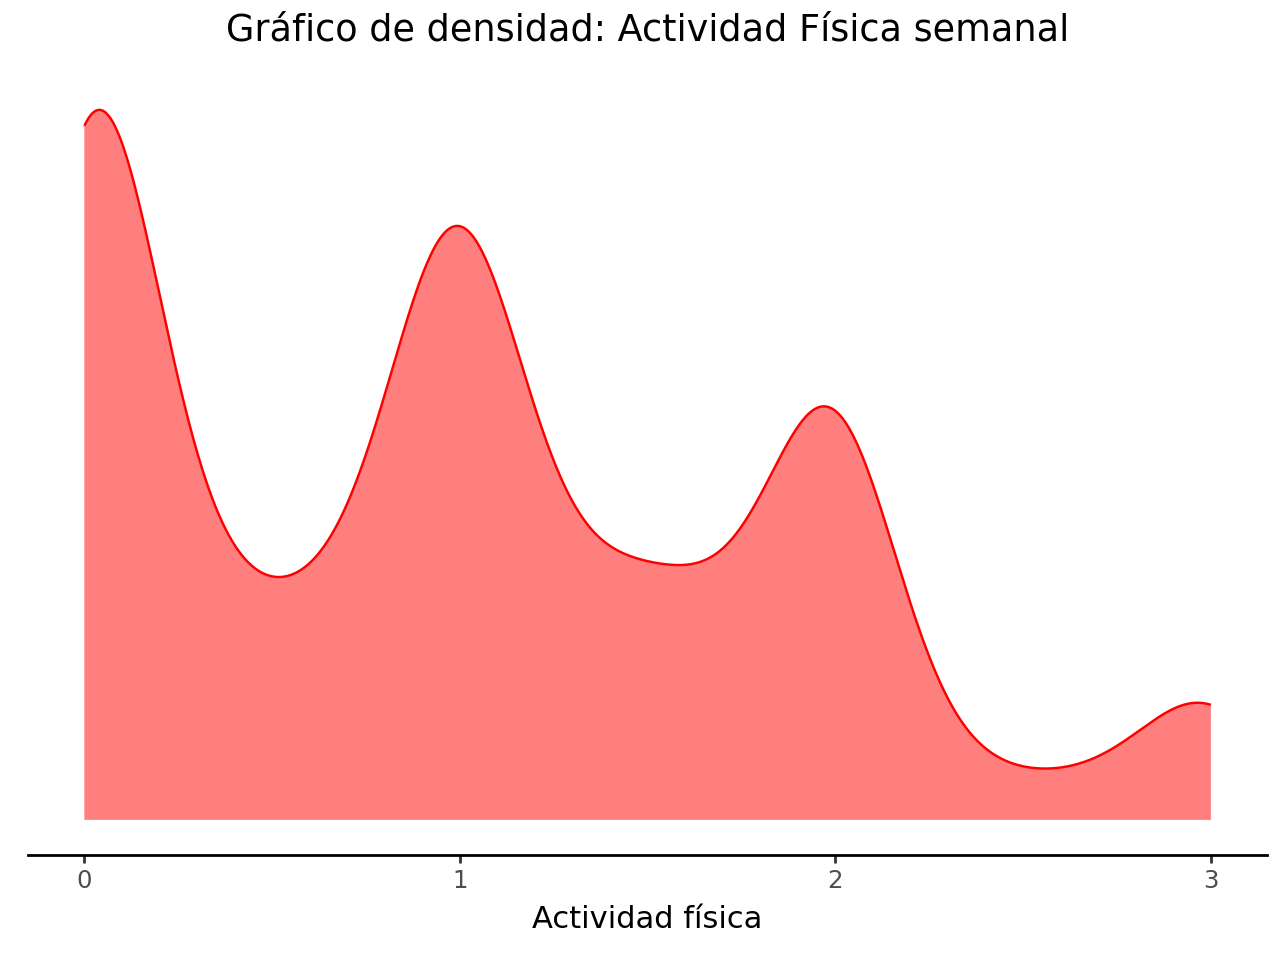


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [26]:
print(ggplot(obesidad, aes(x='FAF')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Actividad Física semanal',x = 'Actividad física') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [27]:
def ejercicio(deporte):
    if deporte <= 0.5:
        return "No hago"
    elif deporte <= 1.5:
        return "1d-2d"
    elif deporte <= 2.5:
        return "2d-4d"
    else:
        return "4d-5d"

#Para FAF, ¿Cuanto ejercicio realizas en una semana?    
obesidad['physical_activity'] = obesidad['FAF'].apply(ejercicio)
orden_categorias = ["No hago","1d-2d","2d-4d","4d-5d"]
obesidad['physical_activity'] = pd.Categorical(obesidad['physical_activity'], categories=orden_categorias, ordered=True)
print(obesidad['physical_activity'].unique())

['No hago', '4d-5d', '2d-4d', '1d-2d']
Categories (4, object): ['No hago' < '1d-2d' < '2d-4d' < '4d-5d']


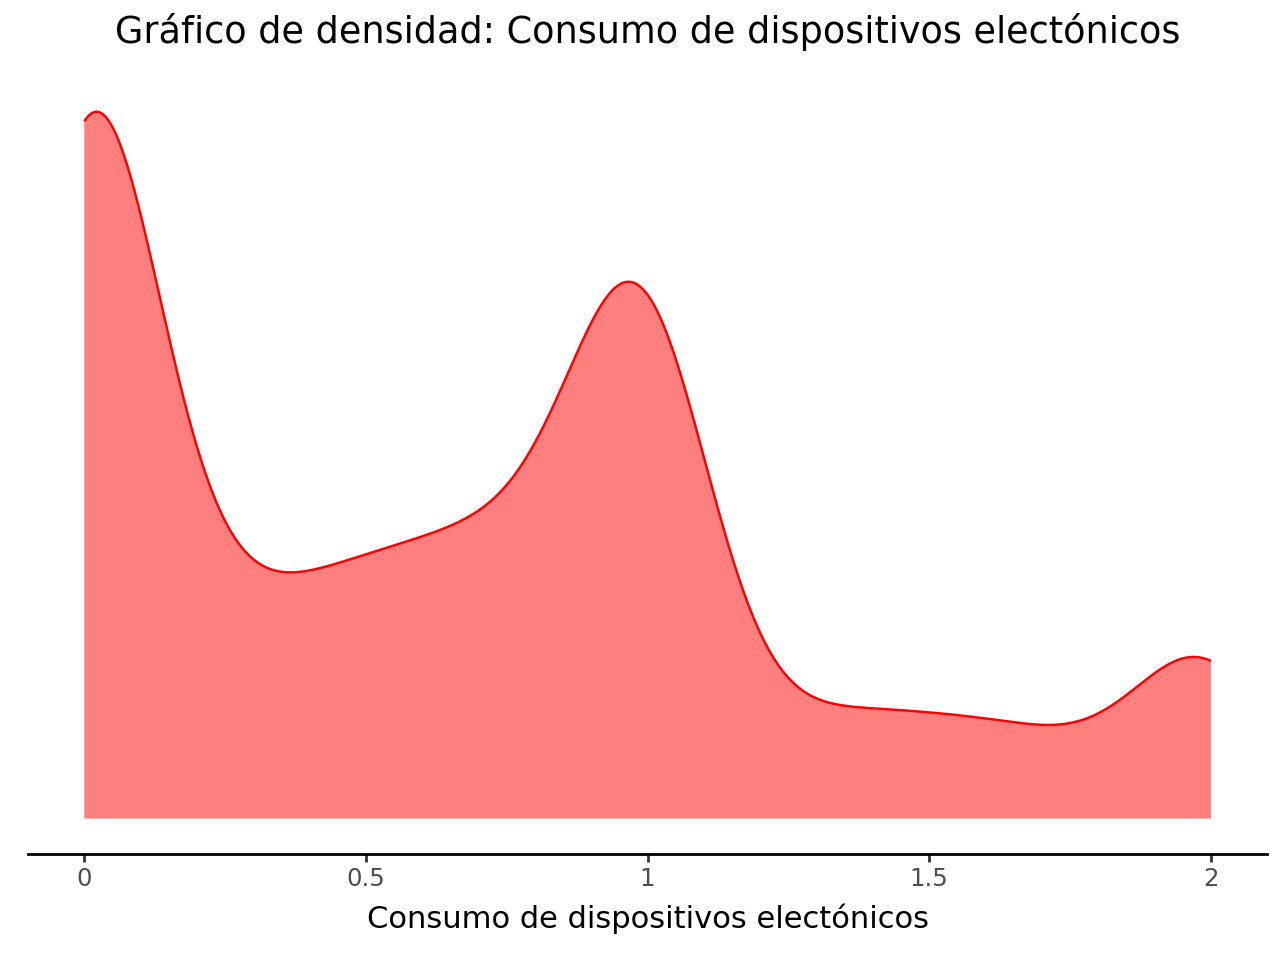


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [28]:
print(ggplot(obesidad, aes(x='TUE')) + 
      geom_density(color = 'red',fill='red',alpha=0.5)+
      labs(title='Gráfico de densidad: Consumo de dispositivos electónicos',x = 'Consumo de dispositivos electónicos') +
      theme(plot_title=element_text(hjust=0.5),
            axis_title_y=element_blank(),
            axis_text_y=element_blank(),
            axis_ticks_major_y = element_blank(),
            panel_background=element_blank(),
            axis_line_x = element_line(color = "black", size=1)) 
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [29]:
def electronica(movil):
    if movil <= 0.5:
        return "0-2h"
    elif movil <= 1.5:
        return "3-5h"
    else:
        return "Más de 5h"

#Para TUE, ¿Cuanto tiempo consumes dispositivos electrónicos en un día? 
obesidad['electronica'] = obesidad['TUE'].apply(electronica)
orden_categorias = ["0-2h","3-5h","Más de 5h"]
obesidad['electronica'] = pd.Categorical(obesidad['electronica'], categories=orden_categorias, ordered=True)
print(obesidad['electronica'].unique())

['3-5h', '0-2h', 'Más de 5h']
Categories (3, object): ['0-2h' < '3-5h' < 'Más de 5h']


De esta manera tenemos pasadas a categóricas todas la variable que deben de ser así

In [30]:
columnas_no_numericas=obesidad.select_dtypes(exclude='number').columns
for campo in columnas_no_numericas:
    print(obesidad[campo].unique())
print('Entre los campos no numéricos no se ve ningún elemento incorrecto')

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['no' 'yes']
['no' 'yes']
['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']
['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']
['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']
['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']
['No hag

In [31]:
obesidad.rename(columns={'CALC':'alcohol'}, inplace=True)
obesidad_limpio=obesidad[['gender', 'age', 'height', 'weight', 'family_history_with_overweight','FAVC','vegetables','comidas','CAEC','SMOKE','water','SCC','physical_activity','electronica','alcohol','MTRANS','obesity_type']]

Veámos los como queda el dataframe procesado

In [32]:
obesidad_limpio.head(3)

,gender,age,height,weight,family_history_with_overweight,FAVC,vegetables,comidas,CAEC,SMOKE,water,SCC,physical_activity,electronica,alcohol,MTRANS,obesity_type
0,Female,21.0,1.62,64.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,No hago,3-5h,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,Siempre,Tres,Sometimes,yes,Más de 2L,yes,4d-5d,0-2h,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,2d-4d,3-5h,Frequently,Public_Transportation,Normal_Weight


Guardamos el dataframe para la presentación de streamlit

In [33]:
obesidad_limpio.to_csv('obesity_limpio.csv', index=False)

### 1er Insight

¿Como evoluciona el nivel de ingesta de alcohol, actividad fisica, consumo de agua y vegetales según sea el nivel de obesidad?¿Hay algun patrón?

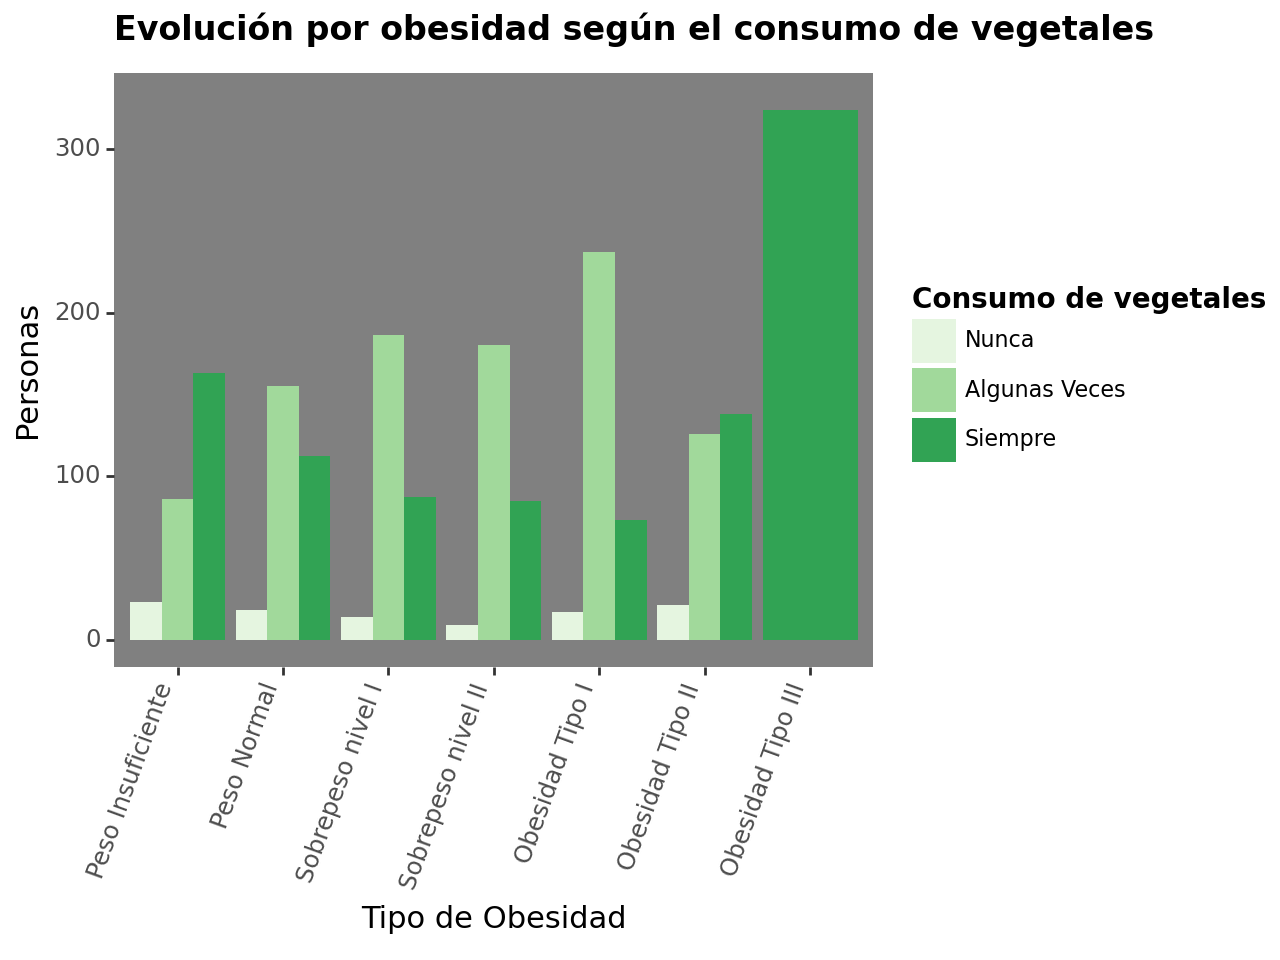

<Figure Size: (640 x 480)>

In [34]:
def insight1(obesidad_limpio,columna,paleta):
    '''
    Se van a estudiar 4 tipos de campos, cada uno con sus etiquetas por ello es preciso asignar como debe de
    ser la etiqueta según la variable
    '''
    if columna == 'vegetables':
        nombre = 'Consumo de vegetales'
        etiquetas = {'Nunca': 'Nunca', 'Algunas veces':'Algunas Veces', 'Siempre': 'Siempre'}
    elif columna == 'water':
        nombre = 'Consumo de agua'
        etiquetas = {'Menos de 1L':'Menos de 1L', '1L-2L':'Entre 1L y 2L','Más de 2L':'Más de 2L'}
    elif columna == 'physical_activity':
        nombre = 'Actividad física'
        etiquetas = {'No hago':'Sedentario', '1d-2d':'1 o 2 días','2d-4d':'3 o 4 días', '4d-5d':'Más de 4 días'}
    else:
        nombre = 'Consumo de alcohol'
        etiquetas = {'no':'Nunca','Sometimes':'A veces', 'Frequently':'Frecuentemente', 'Always':'Siempre'}
    return (ggplot(obesidad_limpio[['obesity_type',columna]], aes(x='obesity_type', fill=f'factor({columna})')) + 
        geom_bar(position='dodge') + 
        labs(title=f'Evolución por obesidad según el c{nombre[1:]}',y='Personas')+ 
        theme(panel_grid_major_x=element_blank(),
              panel_background=element_rect(fill='grey'),
              panel_grid_major_y=element_blank(),
              panel_grid_minor_y=element_blank(),
              #Se añade tanta inclinación porque el texto no entra de otra manera
              axis_text_x = element_text(angle = 70, hjust = 1),
              plot_title = element_text( size = 12,weight='bold'),
              legend_text=element_text(size=8),
              legend_title=element_text(size=10,weight='bold'))+
              scale_x_discrete(name = "Tipo de Obesidad",
        limits = ("Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"),
        labels = ("Peso Insuficiente","Peso Normal","Sobrepeso nivel I","Sobrepeso nivel II","Obesidad Tipo I","Obesidad Tipo II","Obesidad Tipo III"))+
        scale_fill_brewer(palette = paleta,name = f"{nombre}",labels =etiquetas)+
        ylim(0, 330)
        )
insight1(obesidad_limpio,'vegetables','Greens')

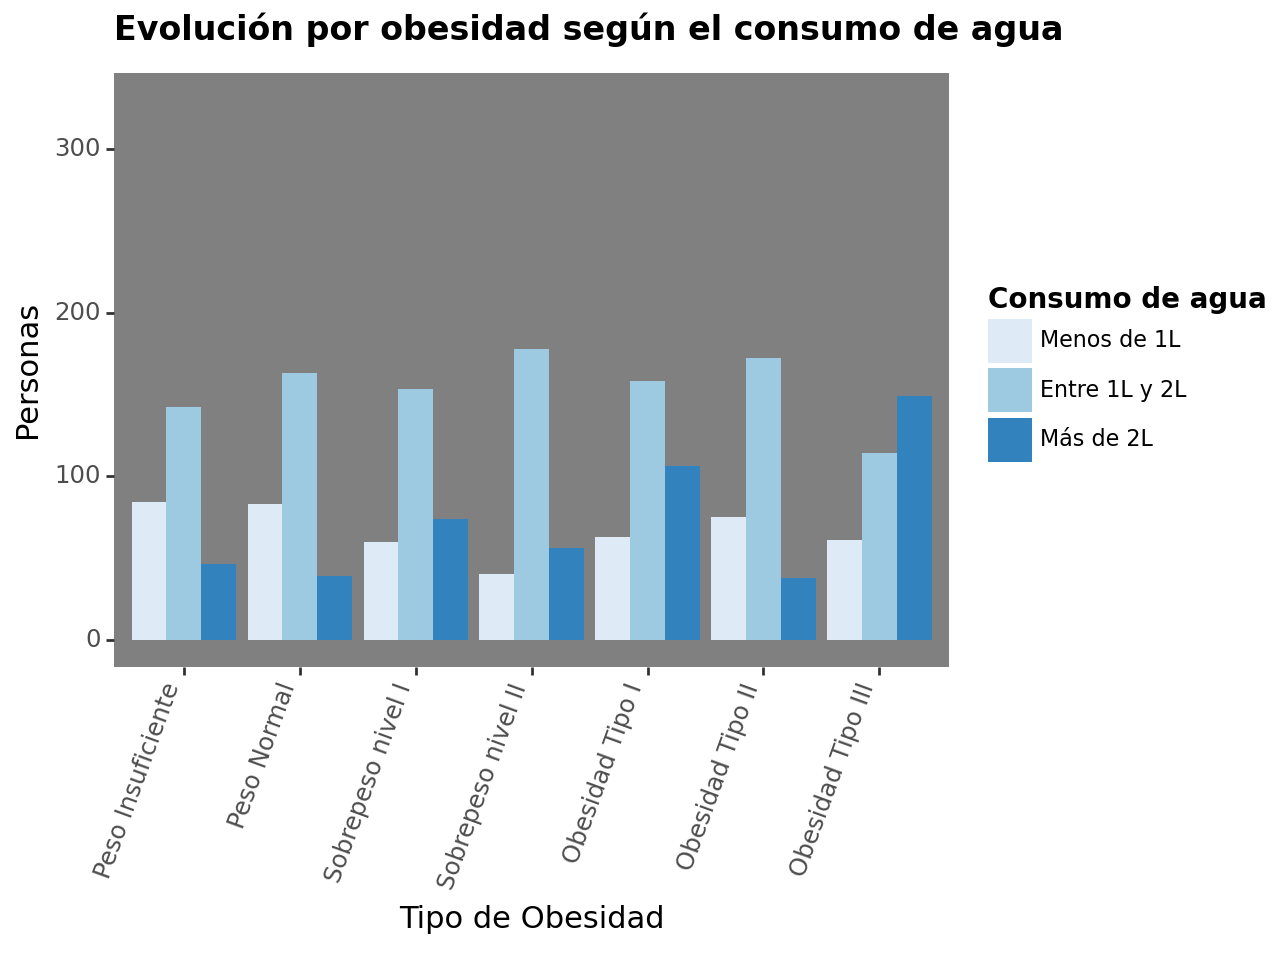

<Figure Size: (640 x 480)>

In [35]:
insight1(obesidad_limpio,'water','Blues')


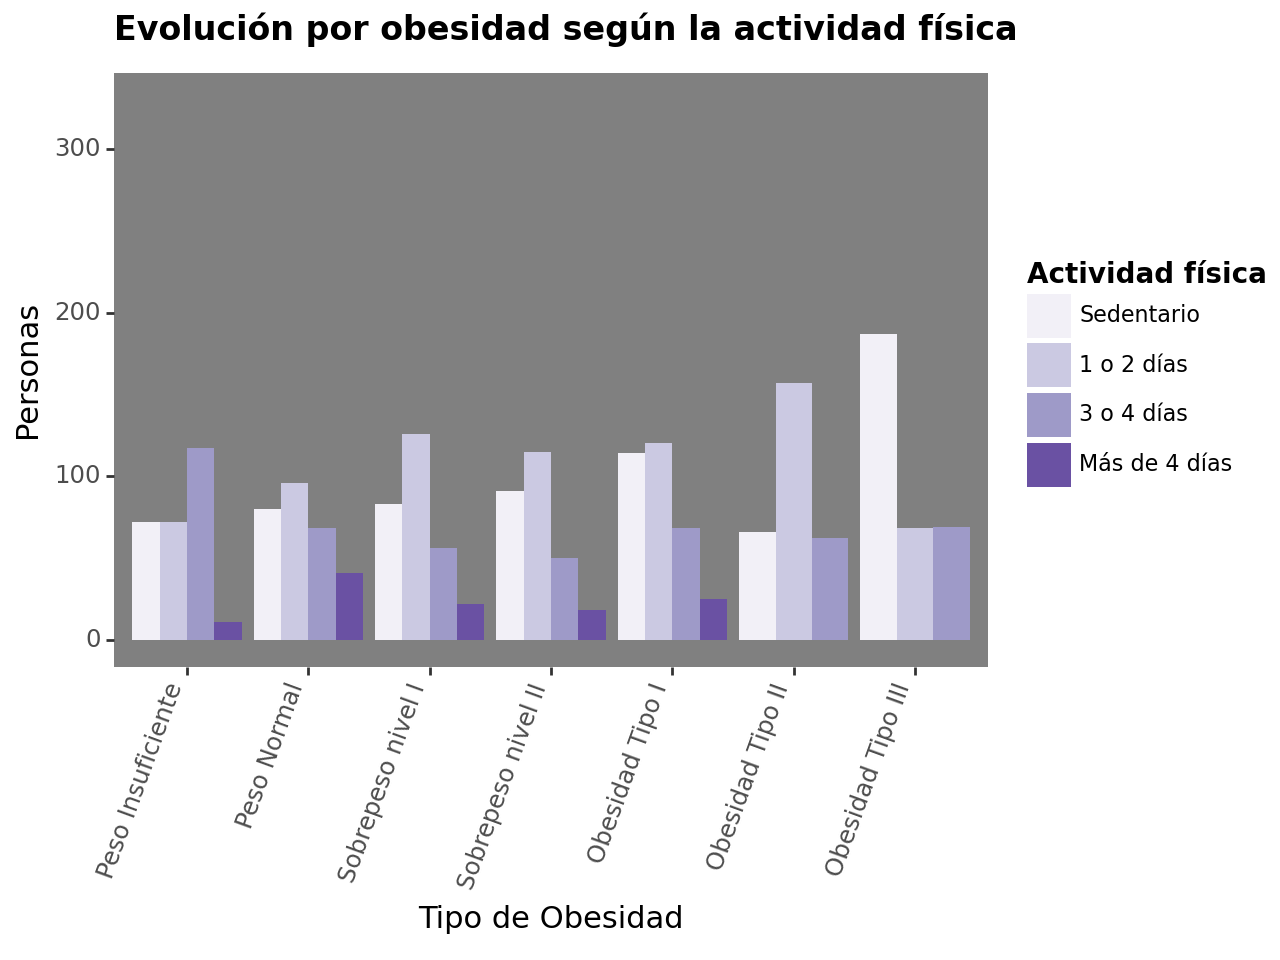

<Figure Size: (640 x 480)>

In [36]:
insight1(obesidad_limpio,'physical_activity','Purples')+labs(title='Evolución por obesidad según la actividad física')


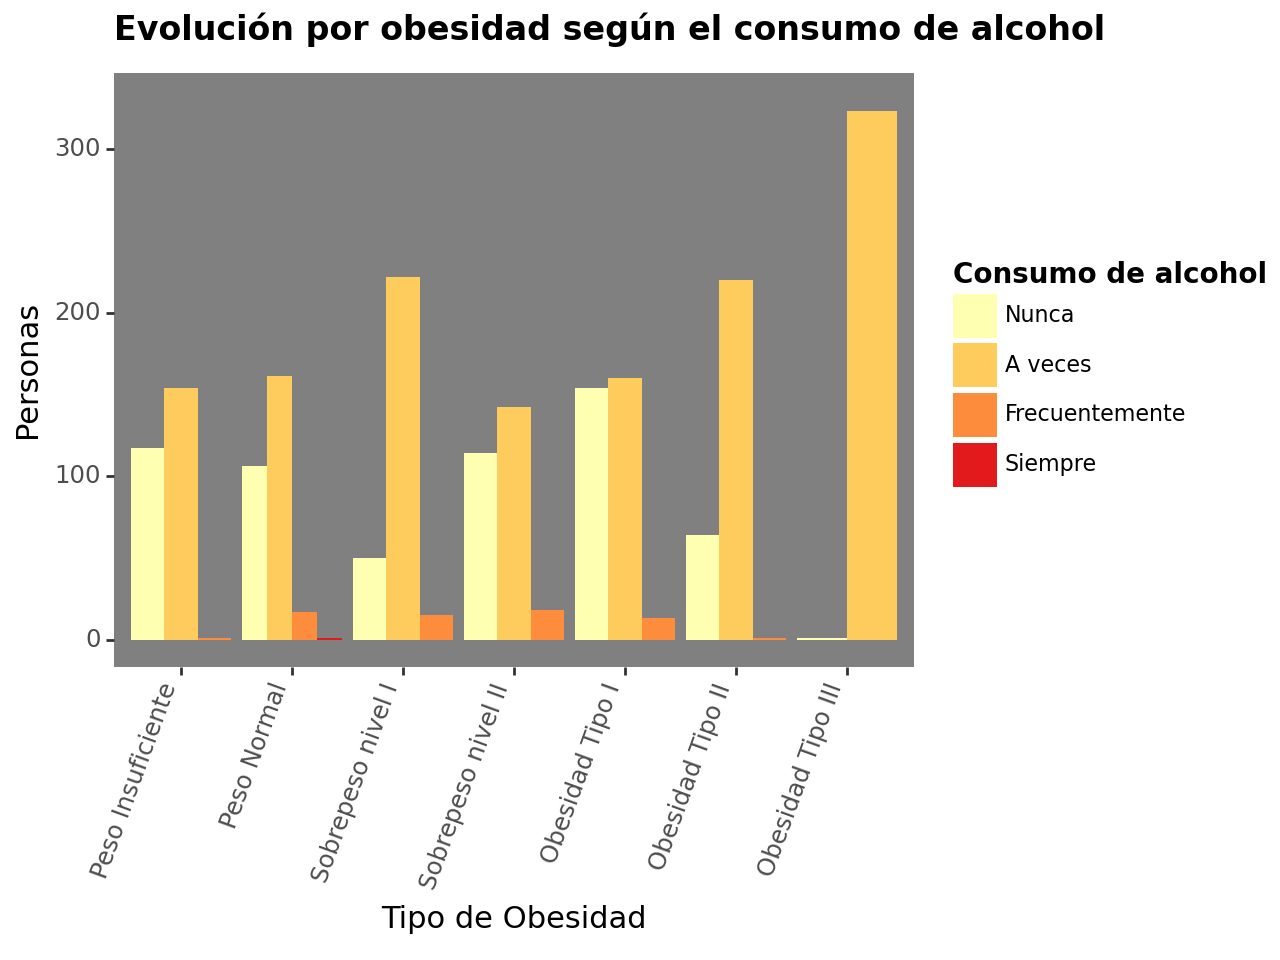

<Figure Size: (640 x 480)>

In [37]:
insight1(obesidad_limpio,'alcohol','YlOrRd')

### 2do Insight

¿Cuánta gente de cada grupo sigue una dieta sana (es decir bebe entre 1y 2 litros de agua, hace ejercicio de 2 a 4 dias por semana, no come mucho entre comidas, sin comida con muchas calorias, no fuma no usa demasiado los juegos, bebe a veces o nunca alcohol, comidas principales 3)?

In [100]:
#Creamos un conjunto de condiciones que nos permiten determinar una dieta sana
dieta_sana_condiciones = (
    (obesidad_limpio['water'].isin(['1L-2L','Más de 2L'])) &
    (obesidad_limpio['physical_activity'].isin(['4d-5d', '2d-4d'])) &
    (obesidad_limpio['comidas']=="Tres") &
    (obesidad_limpio['FAVC'] == 'no') &
    (obesidad_limpio['SMOKE'] == 'no') &
    (obesidad_limpio['electronica']=='0-2h') &
    (obesidad_limpio['alcohol'].isin(['no', 'Sometimes'])) &
    (obesidad_limpio['CAEC'].isin(['no', 'Sometimes'])))

Creamos la columna 'Salud'

In [101]:
obesidad_limpio['Salud']='NA'

In [102]:
obesidad_limpio.loc[dieta_sana_condiciones,'Salud']='Se cuida'

In [103]:
#Creamos un conjunto de condiciones que nos permiten determinar una dieta no sana
dieta_no_sana_condiciones=(~dieta_sana_condiciones) & ((obesidad_limpio['water'].isin(['Menos de 1L','Más de 2L'])) &
    (obesidad_limpio['physical_activity'].isin(['No hago',])) &
    (obesidad_limpio['comidas'].isin(['Entre 1 y 2', 'Más de tres'])) &
    (obesidad_limpio['FAVC'] == 'yes')  &
    (obesidad_limpio['electronica']=='Más de 5h') &
    (obesidad_limpio['alcohol'].isin(['Frequently', 'Always'])) &
    (obesidad_limpio['CAEC'].isin(['Frequently', 'Always']))|
    (obesidad_limpio['SMOKE'] == 'yes'))

In [104]:
obesidad_limpio.loc[dieta_no_sana_condiciones,'Salud']='No se cuida'
obesidad_limpio.loc[(~dieta_no_sana_condiciones)&(~dieta_sana_condiciones),'Salud']='Se cuida poco'

In [105]:
obesidad_limpio['Salud'].value_counts().reset_index()

,Salud,count
0,Se cuida poco,1999
1,No se cuida,40
2,Se cuida,15


La cantidad de personas con una dieta sana tal y como hemos construido la regla es de un número bajo de personas

In [107]:
obesidad_filtrado = obesidad_limpio[obesidad_limpio['Salud'].isin(['Se cuida', 'No se cuida'])]

fig = px.bar(obesidad_filtrado, x='obesity_type', color='Salud', title='Salud de las personas por tipo de obesidad',
             labels={'obesity_type': 'Tipo de Obesidad',"count":"Personas"}, 
             category_orders={'obesity_type': ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']},
             barmode="group",
             color_discrete_map={'Se cuida': '#90ee90', 'No se cuida': '#636efa'})  
fig.update_xaxes(tickangle=-25)


fig.update_layout(title_font=dict(size=20,color='black'),title_x=0.5,
                  xaxis=dict(tickvals=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
                             ticktext=["Peso Insuficiente","Peso Normal","Sobrepeso nivel I","Sobrepeso nivel II","Obesidad Tipo I","Obesidad Tipo II","Obesidad Tipo III"]))
# Mostrar el gráfico
fig.show()


La cantidad de personas que se cuidan frente a las que no se cuidan es mínimamente superior en el grupo con peso insuficiente, en el resto de grupos hay mayor número de personas que no se cuidan

In [84]:
fig = px.scatter(obesidad_limpio, x='weight', y='height', color='Salud', size='age',
                 labels={'weight': 'Peso (kg)', 'height': 'Altura (m)'},
                 title='Relación entre Peso y Altura')
# Modificar el título
fig.update_layout(title_font=dict(size=30,color='black'),title_x=0.5)
# Mostrar el gráfico
fig.show()

In [85]:
m, c = np.polyfit(obesidad_limpio['weight'], obesidad_limpio['height'], 1) #esto utiliza el MSE para pintar la linea de regresión,hacen falta mas componentes en vd

fig = px.scatter(obesidad_limpio, x='weight', y='height', color='Salud',
                 title='Relación entre Peso y Altura',
                 labels={'weight': 'Peso (kg)', 'height': 'Altura (m)'})

# Añade la línea de regresión al gráfico
fig.add_traces(px.line(x=obesidad_limpio['weight'], y=m*obesidad_limpio['weight']+c).data)
# Modificar el título
fig.update_layout(title_font=dict(size=30,color='black'),title_x=0.5)
# Muestra el gráfico resultante
fig.show()

El grupo 'Se cuida poco' es el que más observaciones recoge, en el se observa menos dispersión y se comporta de la manera esperada (a más altura, más peso) aún habiendo bastantes observaciones que se salen de lo previsto.
Las personas dentro del grupo que se cuida siguen esa relación lógica por lo
general aunque no todos ellos se comportan así.

En el grupo de personas que no se cuida observamos como sí hay más dispersión entre puntos y hay puntos que pierden esa relación esperada entre peso y altura que comentamos.

### 3er Insight

¿Cómo es la relación entre uso de móviles y deporte?

In [86]:
obesidad_limpio[['electronica','physical_activity']].value_counts().reset_index().rename(columns={'count':'Personas'})


,electronica,physical_activity,Personas
0,3-5h,1d-2d,340
1,0-2h,1d-2d,338
2,0-2h,No hago,326
3,3-5h,No hago,271
4,3-5h,2d-4d,249
5,0-2h,2d-4d,194
6,Más de 5h,No hago,96
7,Más de 5h,1d-2d,76
8,3-5h,4d-5d,50
9,Más de 5h,2d-4d,47


In [87]:
fig = px.density_heatmap(obesidad_limpio, x='electronica', y='physical_activity',
                         title='Relación entre uso de electrónica y actividad física',
                         category_orders={"physical_activity":['4d-5d', '2d-4d', '1d-2d', 'No hago'],"electronica":['0-2h', '3-5h','Más de 5h']},
                         labels={'electronica': 'Actividad electrónica', 'physical_activity': 'Actividad física'},
                         color_continuous_scale='RdBu_r')
# Modificar el título
fig.update_layout(title_font=dict(size=20,color='black'),title_x=0.5 )

fig.show()

Hay un gran número de personas que se concentran en:

    1. “Personas que hacen 1 o 2 días deporte y usan tecnología de 3 a 5 horas”
    2. “Personas que hacen 1 o 2 días deporte y usan tecnología de 0 a 2 horas”
    3. “Personas que no hacen deporte y usan tecnología entre 0 y 2 horas”

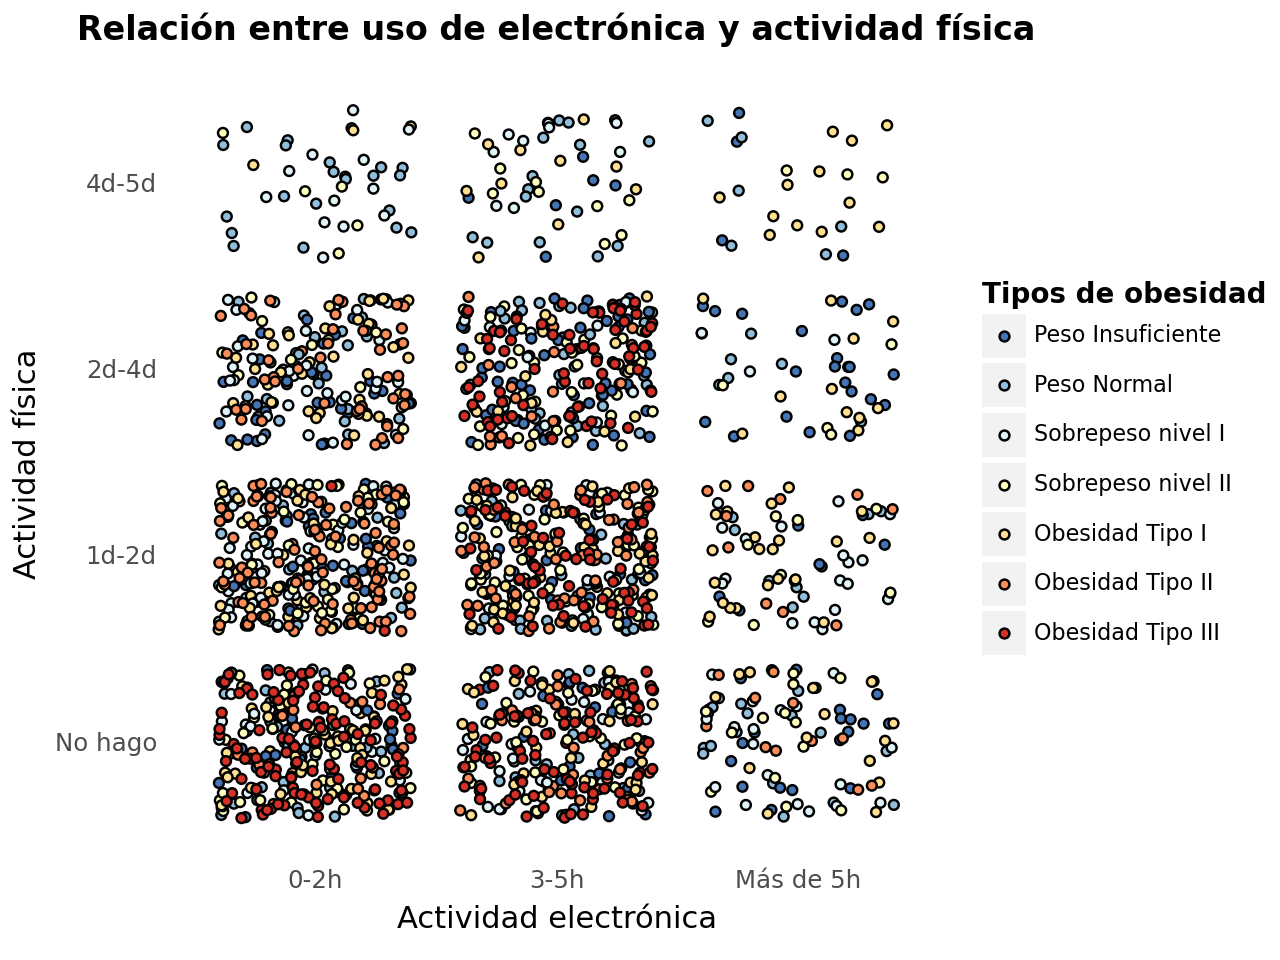

<Figure Size: (640 x 480)>

In [88]:
(ggplot(obesidad_limpio, aes(x='electronica', y='physical_activity', fill='obesity_type')) + 
 geom_jitter() +
 scale_fill_brewer(type='diverging',
                   palette='RdYlBu',
                   direction=-1,
                   name = "Tipos de obesidad",
                   labels = ("Peso Insuficiente","Peso Normal","Sobrepeso nivel I","Sobrepeso nivel II","Obesidad Tipo I","Obesidad Tipo II","Obesidad Tipo III")) +
 labs(x="Actividad electrónica",
      y='Actividad física',
      title='Relación entre uso de electrónica y actividad física')+
 theme(panel_background=element_blank(),
       axis_ticks=element_blank(),
       panel_grid_major=element_blank(),
       panel_grid_minor=element_blank(),
       plot_title = element_text(hjust = 0.5, size = 12,weight='bold'),
       legend_text=element_text(size=8),
       legend_title=element_text(size=10,weight='bold')))



En general vemos pocas observaciones en personas que hagan 4 o 5 días deporte, tampoco en personas que usen más de 5 horas tecnología.

Las personas en grupos de más peso corporal no hacen deporte más de 2 a 4
días semanales. Las personas que entrenan más días son de los grupos de infra
y normo peso.

El grupo más obeso tampoco es el que más abusa de tecnología. La gente
más obesa es sobre todo la gente que hace poco o nada de ejercicio y usa de 0
a 5 horas la tecnología. Es decir, a más sedentarismo (menos ejercicio y más
tecnología), podemos encontrar más personas con sobrepeso y obesidad.

### 4º Insight

¿Qué Grupos de edades consumen más alcohol?

In [89]:
#Creamos una columna que sean los rangos de edad para poder realizar 
#una buena visualización
def crear_lista(paso):
    limite_inicial = 14
    limite_final = 40
    return list(zip(np.arange(limite_inicial, limite_final, paso), np.arange(limite_inicial + paso, limite_final + paso, paso)))

def encontrar_intervalo( elemento,lista_tuplas=crear_lista(5)):
    resultado = next((tupla for tupla in lista_tuplas if elemento >= tupla[0] and elemento < tupla[1]), None)
    return f'{resultado[0]}-{resultado[1]}'
obesidad_limpio['Intervalos_de_edad']=obesidad_limpio['age'].apply(encontrar_intervalo)

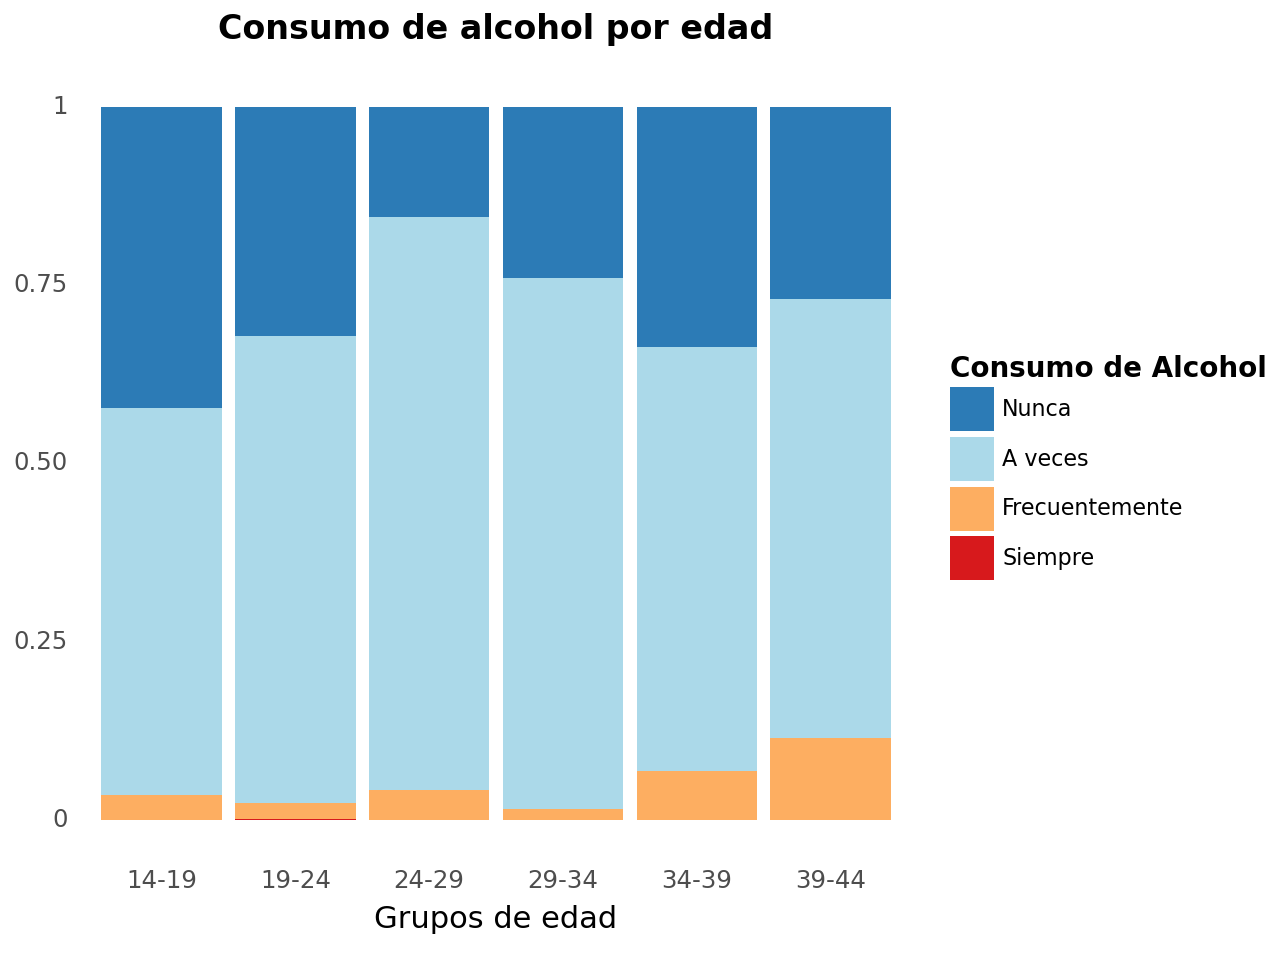

<Figure Size: (640 x 480)>

In [90]:
(ggplot(obesidad_limpio, aes(x='Intervalos_de_edad', fill='alcohol')) + 
    geom_bar(position='fill')+
    labs(title = 'Consumo de alcohol por edad',x = 'Grupos de edad') + 
    scale_fill_brewer(name = 'Consumo de Alcohol',
                      type ='diverging',palette='RdYlBu',
                      direction = -1,
                      labels = {'no':'Nunca','Sometimes':'A veces', 'Frequently':'Frecuentemente', 'Always':'Siempre'}) + 
    theme(plot_title=element_text(hjust=0.5, size = 12,weight='bold'),
          legend_text=element_text(size=8),
          legend_title=element_text(size=10,weight='bold'),
          axis_title_y = element_blank(),
          panel_background=element_blank(),
          axis_ticks=element_blank())
    )

Como podemos ver el consumo esporádico de alcohol en jóvenes tiende a
cierto crecimiento, lo cual creemos que se ajusta bastante al comportamiento
juvenil, pues durante esta etapa se comienza a salir de fiesta y se intensifica
más con la llegada de la universidad y los primeros trabajos, y que disminuya
en los siguientes rangos, también parece que se ajusta a la realidad, pues son
épocas donde se empiezan a asumir responsabilidades grandes en la vida de un
individuo.

## 5º  Insight

¿Hay algún género con más tendencia a la obesidad?


In [91]:
obesidad_genero = obesidad_limpio.loc[:,['gender','obesity_type']].groupby('gender').value_counts()
obesidad_genero = pd.DataFrame(obesidad_genero).reset_index()
#obesidad_genero.columns = ['gender', 'obesity_type', 'count'] en caso de error descomentar esta línea


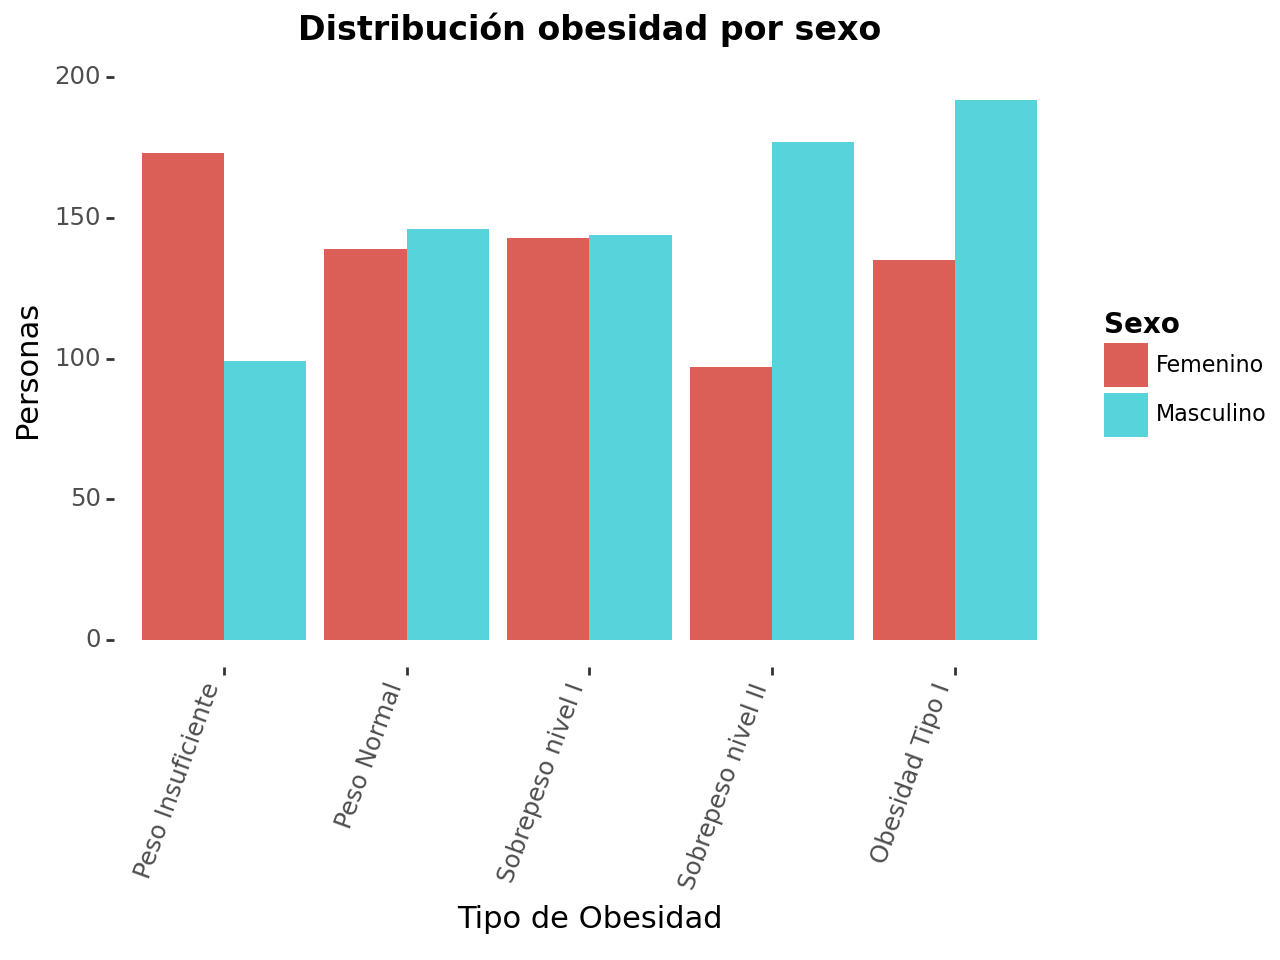

<Figure Size: (640 x 480)>

In [92]:
(ggplot(obesidad_genero.loc[obesidad_genero['obesity_type'].isin(["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I"])],aes(x = 'obesity_type',y = 'count',fill = 'gender')) +
    geom_col(position='dodge') + 
    labs(title='Distribución obesidad por sexo',y='Personas')+
    scale_fill_discrete(name = 'Sexo',labels={'Female': 'Femenino', 'Male': 'Masculino'})+
    theme(panel_background=element_rect(fill='white'),
          panel_grid_major_y=element_blank(),
          panel_grid_minor_y=element_blank(),
          axis_text_x = element_text(angle = 70, hjust = 1),
          plot_title = element_text(hjust = 0.5, size = 12,weight='bold'),
          legend_text=element_text(size=8),
          legend_title=element_text(size=10,weight='bold'))+
    scale_x_discrete(name = "Tipo de Obesidad",
                     limits = ("Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I"),
                     labels = ("Peso Insuficiente","Peso Normal","Sobrepeso nivel I","Sobrepeso nivel II","Obesidad Tipo I"))
)


Debido a la imprecisión de los datos los dos últimos campos no se han utilizado, se puede observar que en índices de obesidad más altos el género dominante es el masculino

## 6º Insight

La retención de grasa tiene un factor genético importante y además el hecho de coger también los malos hábitos alimentarios que puede haber en tu casa, ¿es la genética un factor influyente en el sobrepeso y en los malos hábitos?

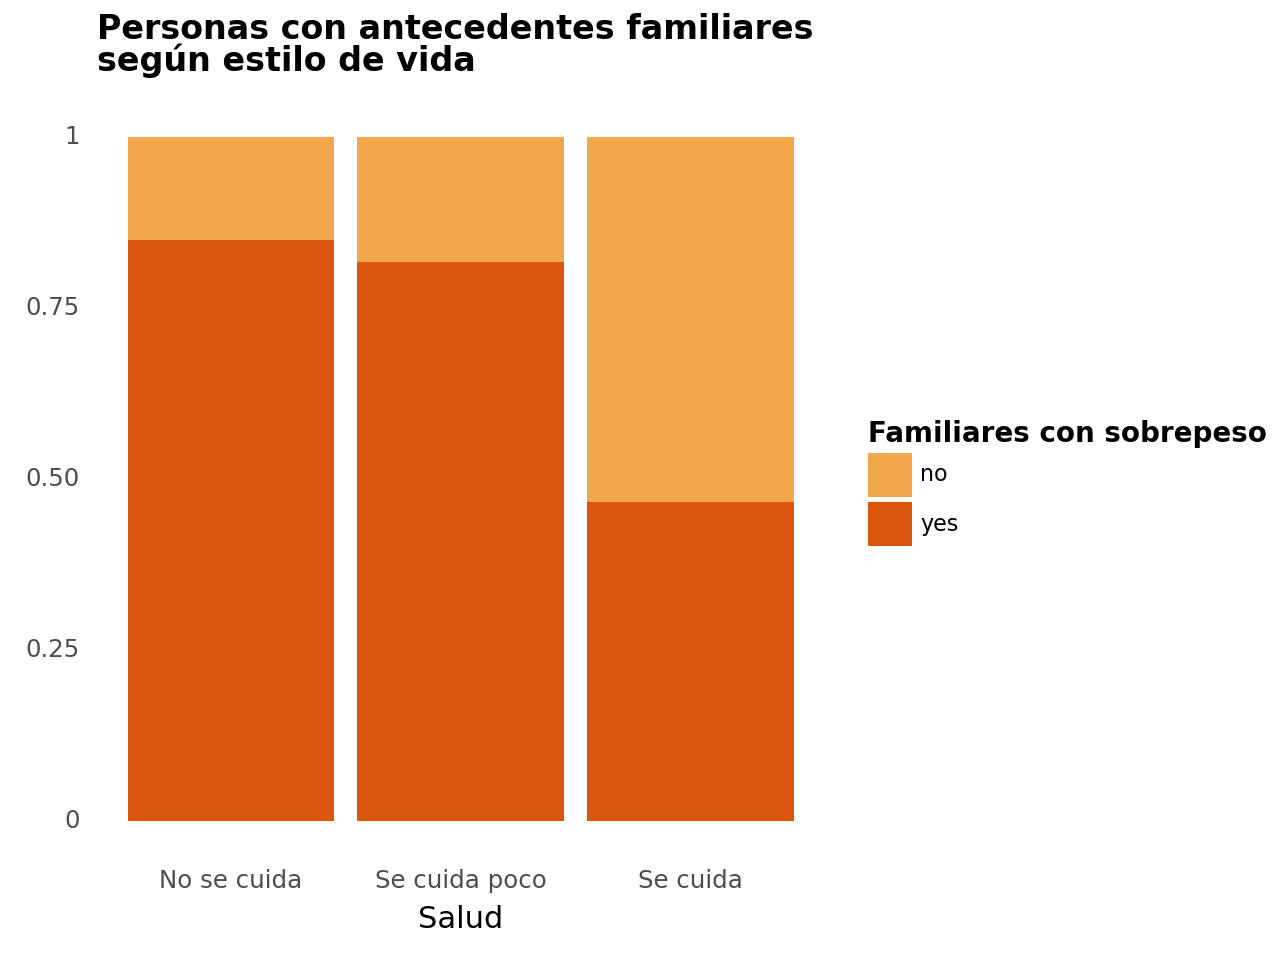

In [93]:
plot7= (ggplot(obesidad_limpio, aes(x='Salud', fill='family_history_with_overweight')) + 
        geom_bar(position='fill')+
        scale_fill_manual(values=["#F2A84A", "#D9560C"],
                          name="Familiares con sobrepeso")+
        labs(y="",
             title="Personas con antecedentes familiares \nsegún estilo de vida")+
        theme(panel_background = element_blank(),
              axis_ticks=element_blank(),
              plot_title = element_text(hjust = 0.5, size = 12,weight='bold'),
              legend_text=element_text(size=8),
              legend_title=element_text(size=10,weight='bold'))
       )
print(plot7)
plot7.save(filename=f'estilo lucia.png', format='png')

Es notable la diferencia existente las categorías, este resultado puede ser un signo que nos puede indicar que sí que es influyente la genética, pero continuemos con el análisis exploratorio

In [94]:
obesidad_limpio.loc[obesidad_limpio['family_history_with_overweight'] == 'yes'].groupby(["obesity_type"]).size().reset_index(name='count')

,obesity_type,count
0,Insufficient_Weight,126
1,Normal_Weight,154
2,Overweight_Level_I,207
3,Overweight_Level_II,259
4,Obesity_Type_I,321
5,Obesity_Type_II,284
6,Obesity_Type_III,324


In [95]:
import plotly.graph_objs as go

def historial_familiar(obesidad_limpio, historial, col):
    if historial=='yes':
        texto='con'
    else:
        texto='sin'
    obesidad_historial = obesidad_limpio.loc[obesidad_limpio['family_history_with_overweight'] == historial].groupby("obesity_type").size().reset_index(name='count')
    
    fig = go.Figure(data=[go.Bar(x=obesidad_historial['obesity_type'], y=obesidad_historial['count'], marker_color=col)])
    
    fig.update_layout(
        xaxis=dict(title='Tipo de Obesidad',
                   tickvals=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
                   ticktext=["Peso Insuficiente","Peso Normal","Sobrepeso nivel I","Sobrepeso nivel II","Obesidad Tipo I","Obesidad Tipo II","Obesidad Tipo III"]),
        yaxis=dict(title='Personas'),
        title=f'Personas por tipo de obesidad {texto} historial familiar',
        xaxis_tickangle=-45,
        plot_bgcolor='rgba(0,0,0,0)',
        title_font=dict(size=25, color='black'),
        font=dict(color='black')
    )
    fig.show()
historial_familiar(obesidad_limpio,'no',"#F2A84A")

In [96]:
historial_familiar(obesidad_limpio,'yes','#D9560C')

Con los resultados provistos se observa una clara influencia de la genetica en el índice de masa corporal de la población

## 7º Insight

¿Qué patrones son los más comunes en las persona con obesidad de tipo 3?

In [108]:
obesidad_limpio.loc[obesidad_limpio['obesity_type']=='Obesity_Type_III'][['family_history_with_overweight','FAVC','vegetables','comidas','CAEC','SMOKE','alcohol','water','SCC','physical_activity']].value_counts().reset_index().rename(columns={'family_history_with_overweight':'Historial familiar','FAVC':'Comida alta en calorias','vegetables':'Vegetables','SMOKE':'Fuma','water':'Agua','SCC':'Contar calorias','count':'Personas','CALC':'alcohol','physical_activity':'Actividad física','CAEC':'Comer entre comidas'})

,Historial familiar,Comida alta en calorias,Vegetables,comidas,Comer entre comidas,Fuma,alcohol,Agua,Contar calorias,Actividad física,Personas
0,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,Más de 2L,no,No hago,99
1,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,1L-2L,no,No hago,47
2,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,Menos de 1L,no,No hago,39
3,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,1L-2L,no,2d-4d,37
4,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,1L-2L,no,1d-2d,29
5,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,Más de 2L,no,1d-2d,29
6,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,Más de 2L,no,2d-4d,20
7,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,Menos de 1L,no,2d-4d,11
8,yes,yes,Siempre,Tres,Sometimes,no,Sometimes,Menos de 1L,no,1d-2d,10
9,yes,no,Siempre,Tres,Sometimes,no,no,Más de 2L,no,No hago,1


La mayoría de personas de este grupo consumen alimentos con alto contenido en calorias, no controlan su consumo, comen verduras, algún familiar ha sufrido de sobre peso, tienen 3 comidas, comen de vez en cuando comida entre comidas, sorprendentemente ninguno fuma y beben a veces alcohol.
Por otra parte ademas de las características anteriores el grupo mas dominante es aquel que no tiene actividad física y bebe más de 2l

## 8º Insight
¿Hay algún patrón entre los tipos de obesidad y los medios de transporte?

In [98]:
obesidad_limpio['MTRANS'].value_counts().reset_index()

,MTRANS,count
0,Public_Transportation,1578
1,Automobile,405
2,Walking,55
3,Motorbike,10
4,Bike,6


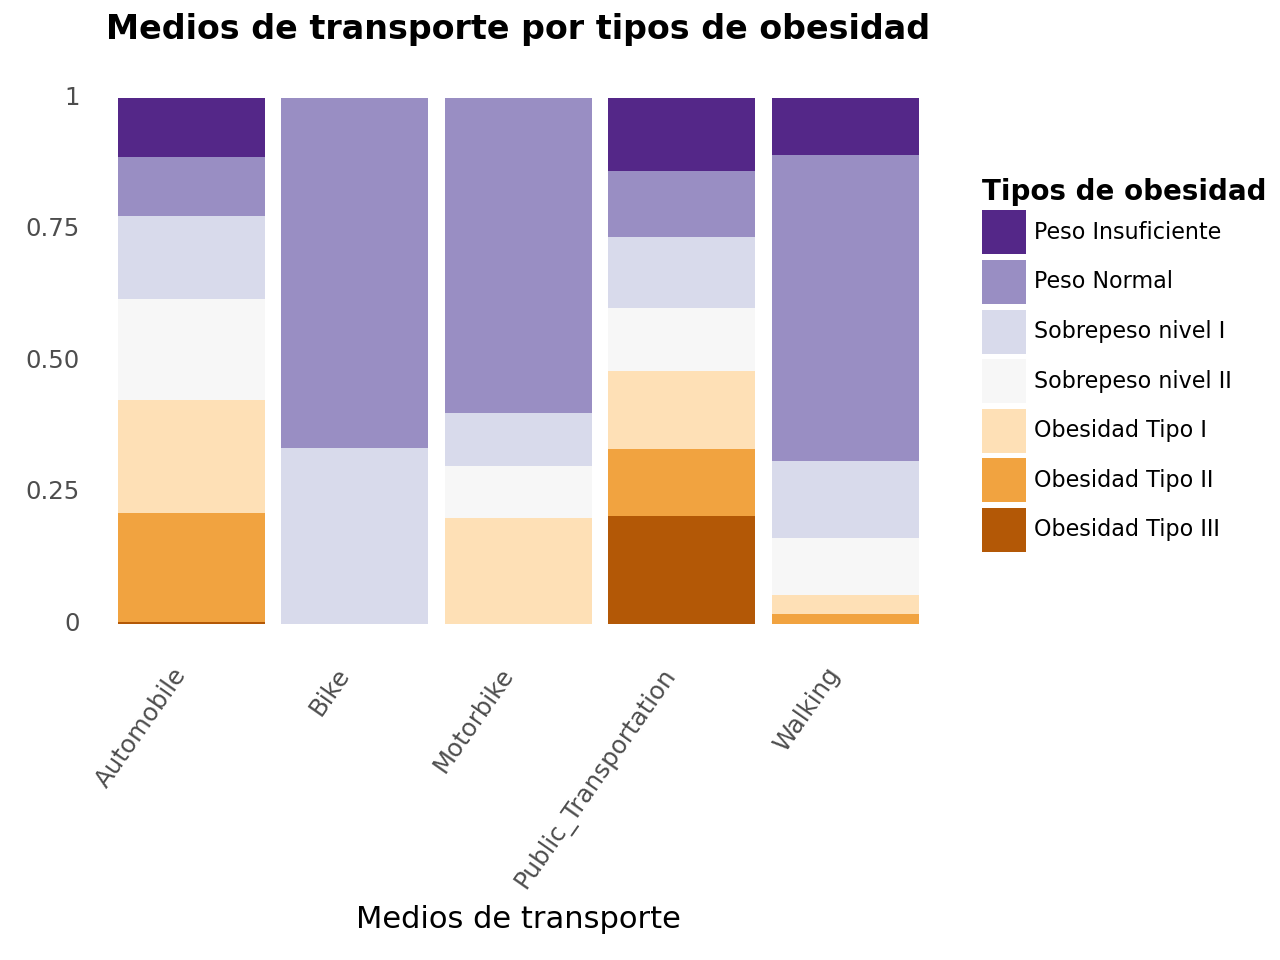

In [60]:
fig= (ggplot(obesidad_limpio, aes(x='MTRANS', fill='obesity_type')) + 
      geom_bar(position='fill')+
      scale_fill_brewer(type ='diverging',
                        palette='PuOr',
                        direction = -1,
                        name="Tipos de obesidad",
                        labels = ("Peso Insuficiente","Peso Normal","Sobrepeso nivel I","Sobrepeso nivel II","Obesidad Tipo I","Obesidad Tipo II","Obesidad Tipo III"))+
      labs(title="Medios de transporte por tipos de obesidad",
           y='',
           x='Medios de transporte')+
      theme(panel_background = element_blank(),
            axis_ticks=element_blank(),
            axis_text_x=element_text(rotation=55,hjust=1),
            axis_ticks_major_y = element_blank(),
            plot_title = element_text(hjust = 0.5, size = 12,weight='bold'),
            legend_text=element_text(size=8),
            legend_title=element_text(size=10,weight='bold'))
     )
print(fig)

Se observa que los medios de transporte que exigen algún tipo de esfuerzo físico son menos utilizados por los grupos con mayor obesidad